**Clustering:** descriptivo

**Objetivo:**  ¿la descripción que me ofrece (una feature categórica) es buen atributo predictor de la clase? ¿Correlación? ¿Con cuántos clusters correla mejor?

**Cargar los datos**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_train.csv
/kaggle/input/mnist-in-csv/mnist_test.csv


In [4]:
# the dataset have already been split into train, test set
test_set = "/kaggle/input/mnist-in-csv/mnist_test.csv"
train_set = "/kaggle/input/mnist-in-csv/mnist_train.csv"


In [5]:
# dump the train dataset into pandas dataframe for easy manipulation
# and plotting (don't touch the test set until when you are finally going to
# test in on the final model)

X_train = pd.read_csv(train_set)
X_test = pd.read_csv(test_set)
X_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# to check out what we are going to be working with
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 1x1 to 28x28
dtypes: int64(784)
memory usage: 358.9 MB


Separar: 
* X: input features
* y: clase real

In [9]:
# re-arrange:  y:class and x:features
y_train = X_train['label'].copy()
X_train.drop('label', axis=1, inplace=True)

In [10]:
# for visualization
import seaborn as sns
from matplotlib import pyplot as plt


<BarContainer object of 10 artists>

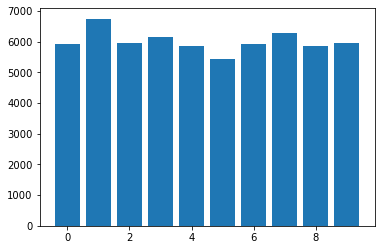

In [18]:
# num samples per class
plt.bar(y_train.value_counts().index, y_train.value_counts())


In [15]:
# you can change the random_image value to visualize any other image

def visualize(i):
    some_digit = X_train.iloc[i] # select any number, change to select any number
    plt.imshow(some_digit.values.reshape(28, 28))
    print('label', y_train.iloc[i])

label 0


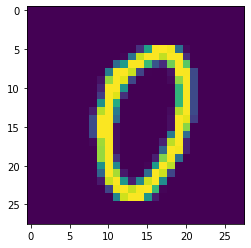

In [16]:
visualize(1000)

label 9


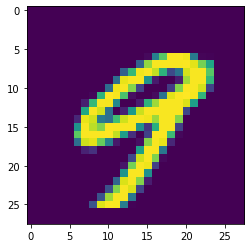

In [17]:
visualize(1005)

**Clustering**

In [22]:
from sklearn.cluster import KMeans
n_clusters=10
kmeans = KMeans(n_clusters)
kmeans.fit(X_train)
# get the cluster-labels for each instance in the X_train
kmeansLabels = kmeans.predict(X_train)


In [ ]:
from sklearn.manifold import TSNE 
tsne = TSNE().fit_transform(X_train)

In [24]:
from sklearn.decomposition import PCA

print('Dim originally: ',X_train.shape)
# Reducir las dimensiones para visualizarlas: PCA
pca = PCA(n_components=2)
pca.fit(X_train)
# Cambio de base a dos dimensiones PCA 
X_train_PCAspace = pca.transform(X_train)
print('Dim after PCA: ',X_train_PCAspace.shape)

(60000, 784)
(60000, 2)


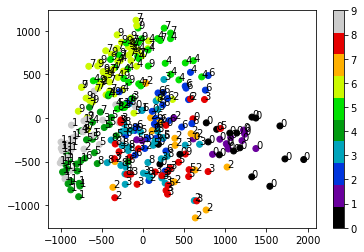

In [36]:
import matplotlib.pyplot as plt

# Dibujar sólo unas pocas instancias
samples = 300
# Dibujar los puntos en el espacio, color: cluster, etiqueta-numérica: clase
# Color del punto: cluster
sc = plt.scatter(X_train_PCAspace[:samples,0],X_train_PCAspace[:samples,1], cmap=plt.cm.get_cmap('nipy_spectral', 10),c=kmeansLabels[:samples])
plt.colorbar()
# Etiqueta numérica: clase 
for i in range(samples):
    plt.text(X_train_PCAspace[i,0],X_train_PCAspace[i,1], y_train[i])
    

In [ ]:
# TO.DO
# Visualizar, aleatoriamente, 4 imágenes de cada cluster

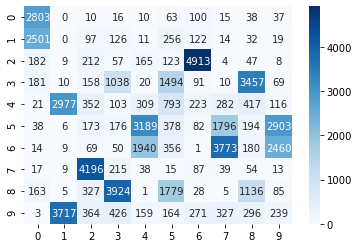

In [39]:
from sklearn.metrics import confusion_matrix

# El atributo generado por K-means es int, hay que pasarlos a string
to_string = lambda x : str(x)
# Obtener matriz de confusión Class to clustering eval
cm = confusion_matrix(np.vectorize(to_string)(kmeansLabels), np.vectorize(to_string)(y_train))
# Mapa de calor a partir de la matriz de confusion
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [ ]:
# To-Do
# Re-asingar labels para que la matriz de confusión cobre más sentido en la diagonal

Cualitativamente parece que correla con la clase y la matriz de confusión también nos da cierta información cuantitativa sobre la correlación. Medir cuantitativamente la correlación de la etiqueta cluster con la clase. ¿Y si en lugar de 10 clusters generamos más se obtiene mayor correlación? 